# Zero to Hero

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [1]:
library( "data.table")   #cargo la libreria  data.table

"https://storage.googleapis.com/labo2021/datasetsOri/paquete_premium_202011.csv" está en el repositorio de la asignatura

In [2]:
dataset <- fread( "https://storage.googleapis.com/labo2021/datasetsOri/paquete_premium_202011.csv")

Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están viajando 117MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [3]:
nrow( dataset )
ncol( dataset )

[1] 238608

[1] 159

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda poscion  dataset[ 1, 2, 3 ]

In [4]:
dataset[ , .N ]

[1] 238608

nombre de las columnas del dataset

Exploración de clase_ternaria.

In [5]:
dataset[ , .N, clase_ternaria]

clase_ternaria,N
<chr>,<int>
CONTINUA,236866
BAJA+1,767
BAJA+2,975


###  varias formas de contar los BAJA+2

todas las formas dan el mismo resultado

In [6]:
nrow(  dataset[ clase_ternaria=="BAJA+2" ])

[1] 975

In [7]:
dataset[ clase_ternaria=="BAJA+2", .N ] #el autentico estilo data.table

[1] 975

In [8]:
dataset[  , sum(clase_ternaria=="BAJA+2")]

[1] 975

### Conteo de proporcion de BAJA+2 en el dataset

In [9]:
dataset[  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.0040862

Conteo de la proporcion de BAJA+2 en un predicado

In [10]:
dataset[ ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.02739508

### Ganancias del dataset

Agregado de la columna ganancia al dataset

Primero le asigno a TODOS los registros el valor de  -1250
<br>
la asignacion se hace con el  :=

In [11]:
dataset[  , ganancia := -1250]

y finalmente a los  BAJA+2 les asigno 48750

In [12]:
dataset[ clase_ternaria=="BAJA+2", ganancia := 48750]

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [13]:
dataset[ , sum(ganancia)]

[1] -249510000

Se **pierden**  249.5 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple
ctrx_quarter < 20

In [14]:
dataset[ ctrx_quarter < 20,  sum( ganancia )  ]

[1] 2260000

Ahora  la ganancia de  *ctrx_quarter < 4 *

In [15]:
dataset[ ctrx_quarter < 4,  sum( ganancia )  ]

[1] 3456250

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de  ctrx_quarter
<br>
Ya resolveremos esto en forma inteligente más adelante

In [16]:
for(  transacciones  in   0:20)
{
   cat(  transacciones, dataset[ ctrx_quarter < transacciones,  sum( ganancia )  ] , "\n")    
}

0 0 
1 2353750 
2 2797500 
3 3205000 
4 3456250 
5 3433750 
6 3586250 
7 4005000 
8 4247500 
9 4517500 
10 4310000 
11 4456250 
12 4351250 
13 4268750 
14 4053750 
15 3951250 
16 4130000 
17 3412500 
18 2953750 
19 3123750 
20 2260000 


Observo que el predicado  ctrx_quarter < 9 tiene una ganancia de 4.5 millones de pesos

### Ganancias de predicado complejo

In [17]:
dataset[ ctrx_quarter < 19 & mpasivos_margen < 29.8 ,  sum( ganancia )  ]

[1] 7455000

Enhorabuena ! hemos alcanzado los 7.45 M de ganancia

### gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

In [18]:
library("ggplot2") #cargo la libreria ggplot2

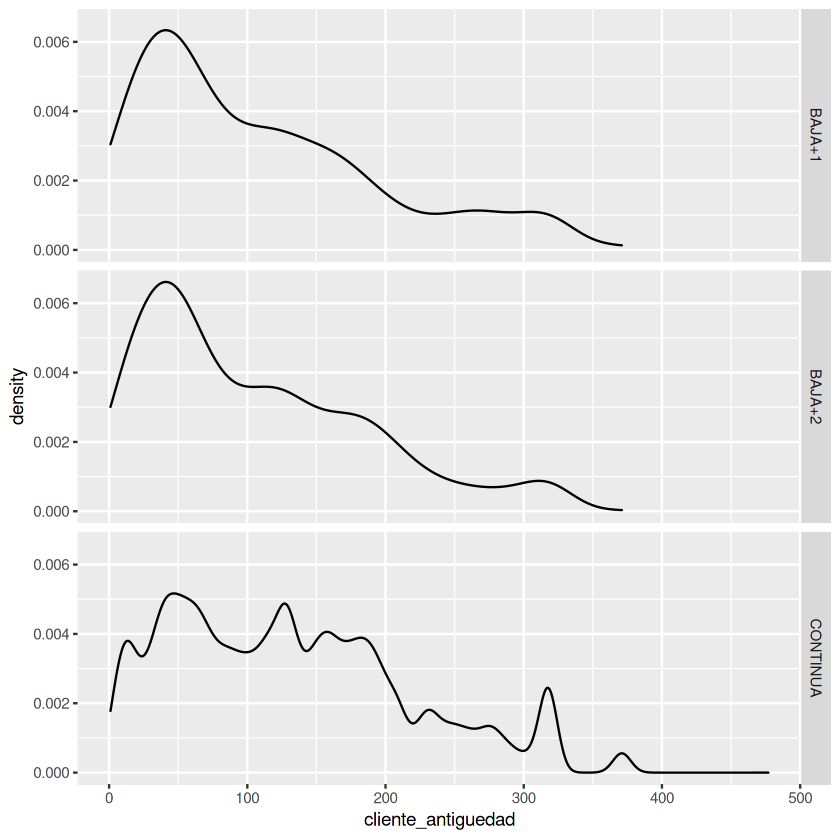

In [19]:
campo <- "cliente_antiguedad" 
ggplot(dataset, aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [20]:
options(repr.plot.width=15, repr.plot.height=15)

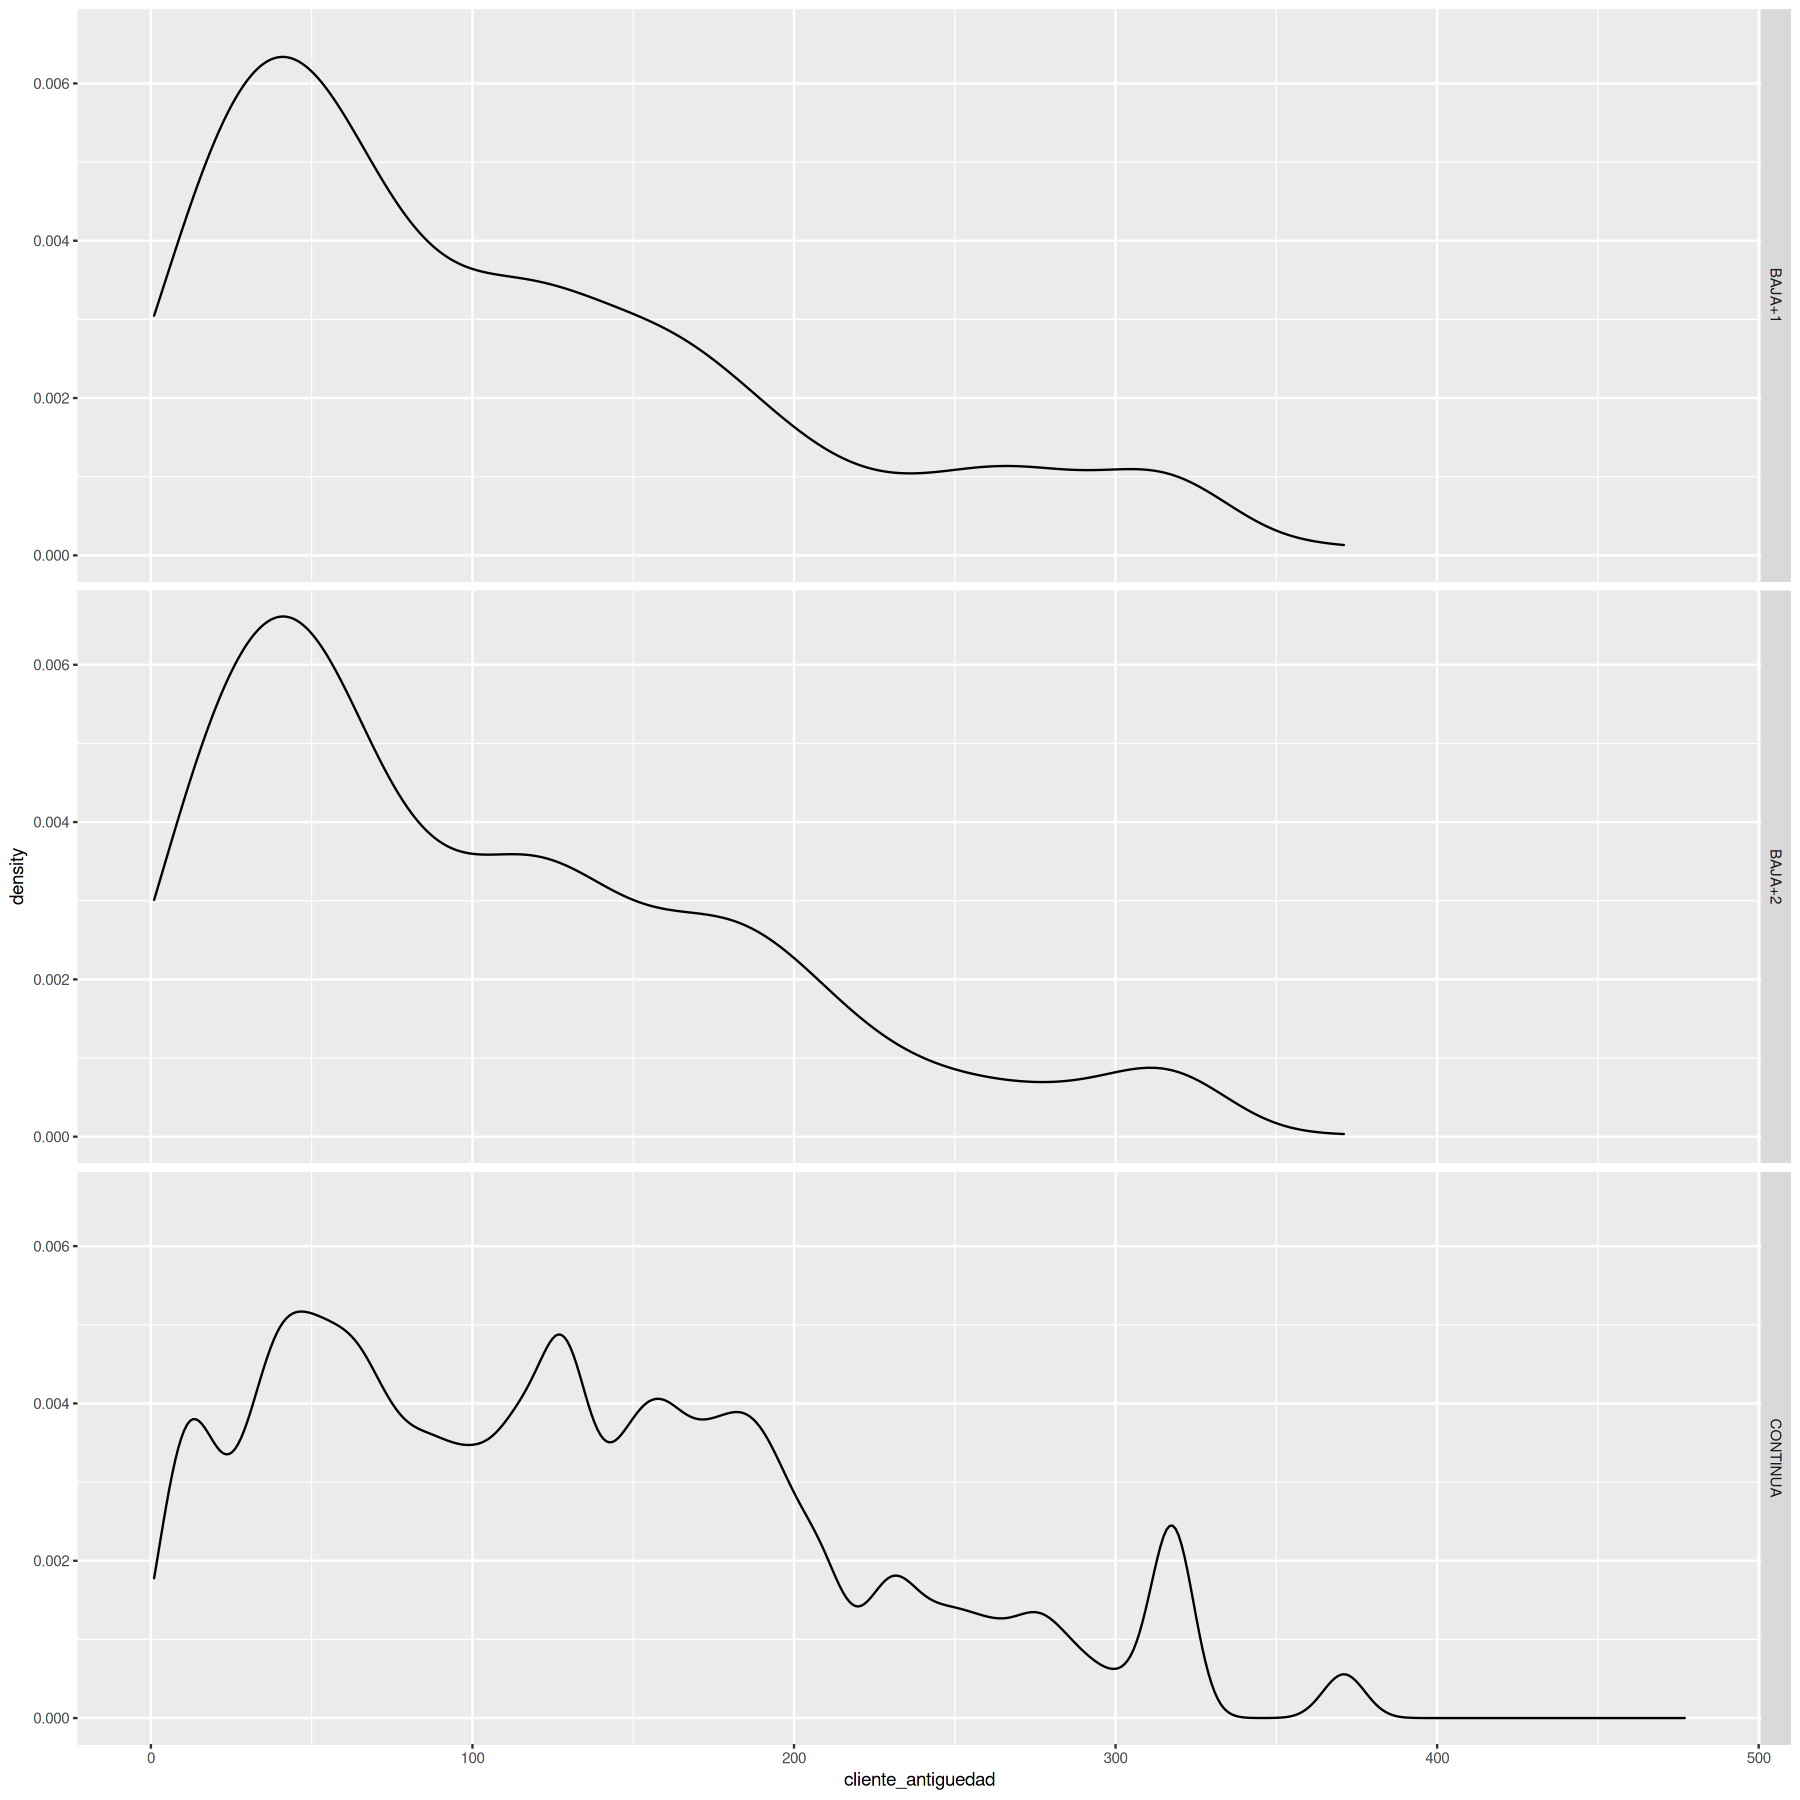

In [21]:
campo <- "cliente_antiguedad" 
ggplot(dataset, aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")